<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis (EDA). EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

Problems 1 thru 6 use a small dataset on state SAT scores.

Problems 7 thru 12 use a fraction of the Iowa Liquor Sales dataset (described in more detail in question 7).

---

This project includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [168]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [169]:
sat_filepath = '/Users/tyronewilliams/Desktop/DSI-SF-4/datasets/state_sat_scores/sat_scores.csv'

In [170]:
sat = pd.read_csv(sat_filepath)

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [171]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [172]:
sat.head(10)


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [173]:
sat.Rate.describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [174]:
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [175]:
sat.dtypes
sat_dictionary = {"State": " State of SAT","Rate":"College eligible pass rate", "Verbal":"English profeciency score",
                  "Math":"Math profeciency score"}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

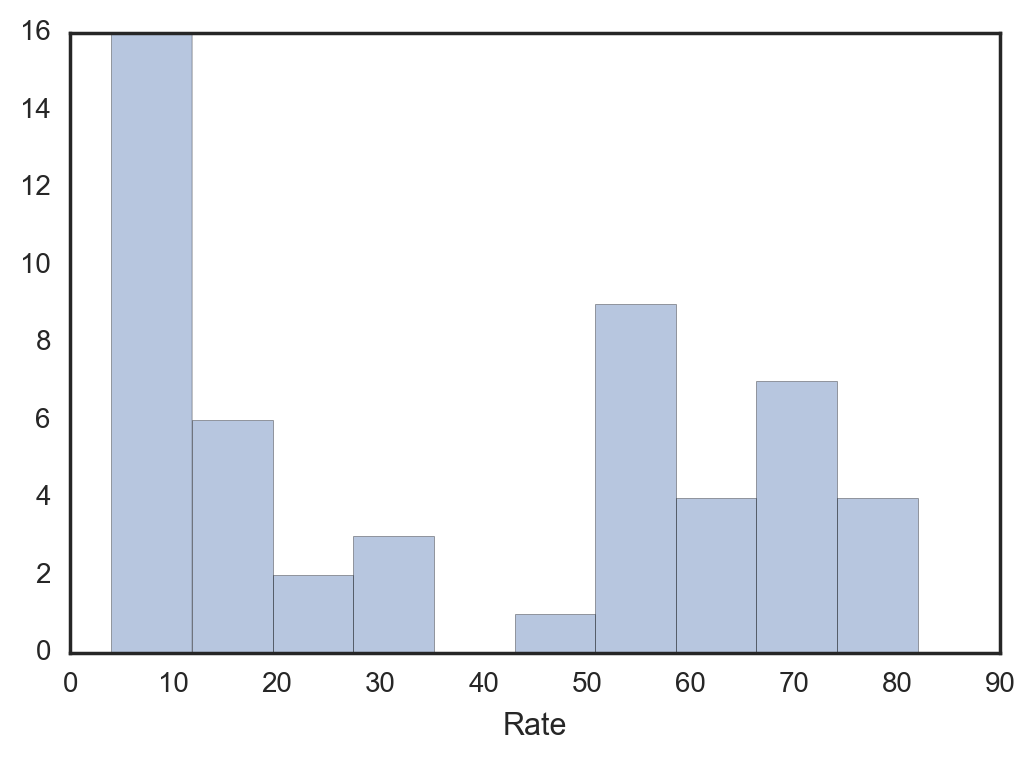

In [130]:
sns.distplot(sat["Rate"], kde =False, bins=10)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

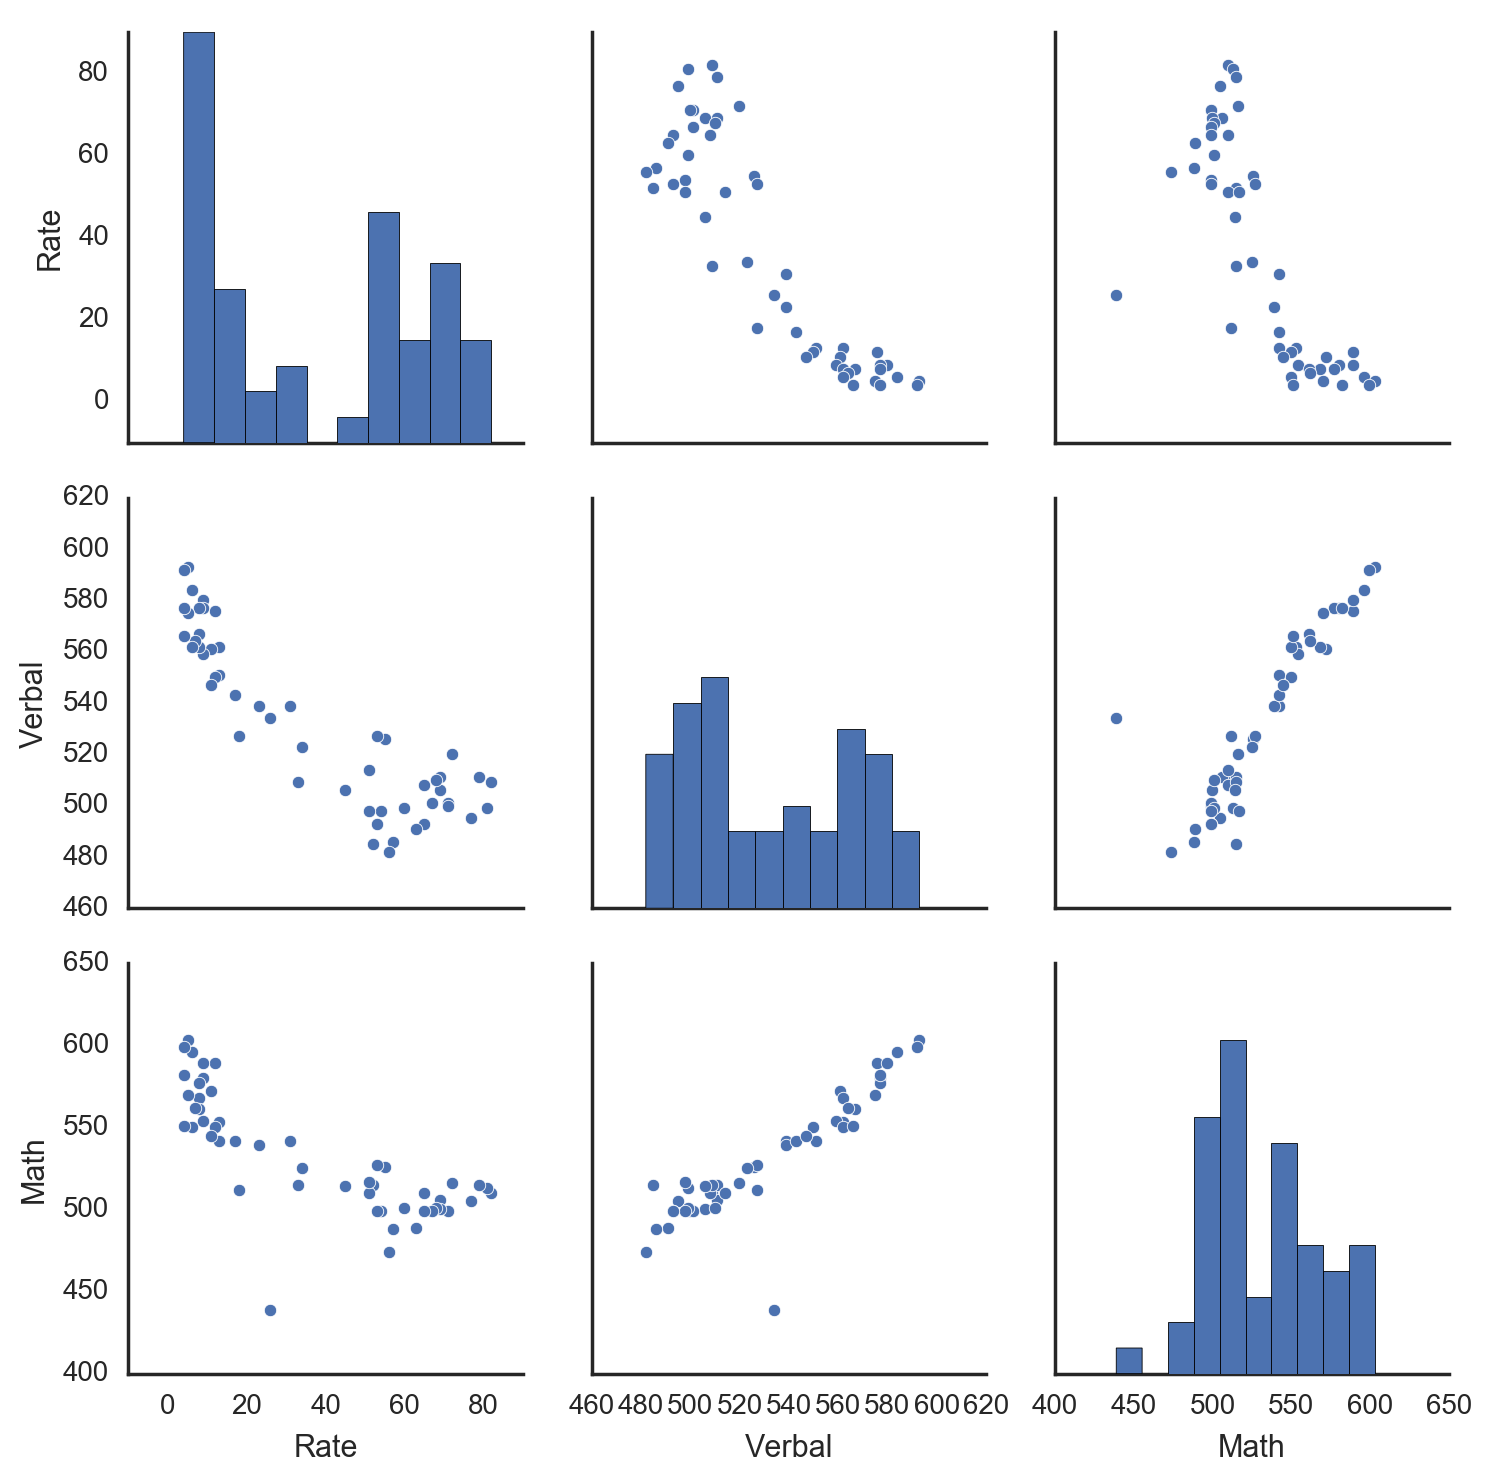

In [131]:
sns.pairplot(data =sat)

In [ ]:
#Shows a scatter of each data set against each other which can give us ideas into possible 
#correlations between variables as well as the quantity of scores in each given category along the diagonal

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

([array([  1.,   0.,   2.,  10.,  13.,   3.,   9.,   5.,   4.,   5.]),
  array([  1.,   0.,   5.,  21.,  23.,   8.,  15.,  13.,  11.,   7.])],
 array([ 439. ,  455.4,  471.8,  488.2,  504.6,  521. ,  537.4,  553.8,
         570.2,  586.6,  603. ]),
 <a list of 2 Lists of Patches objects>)

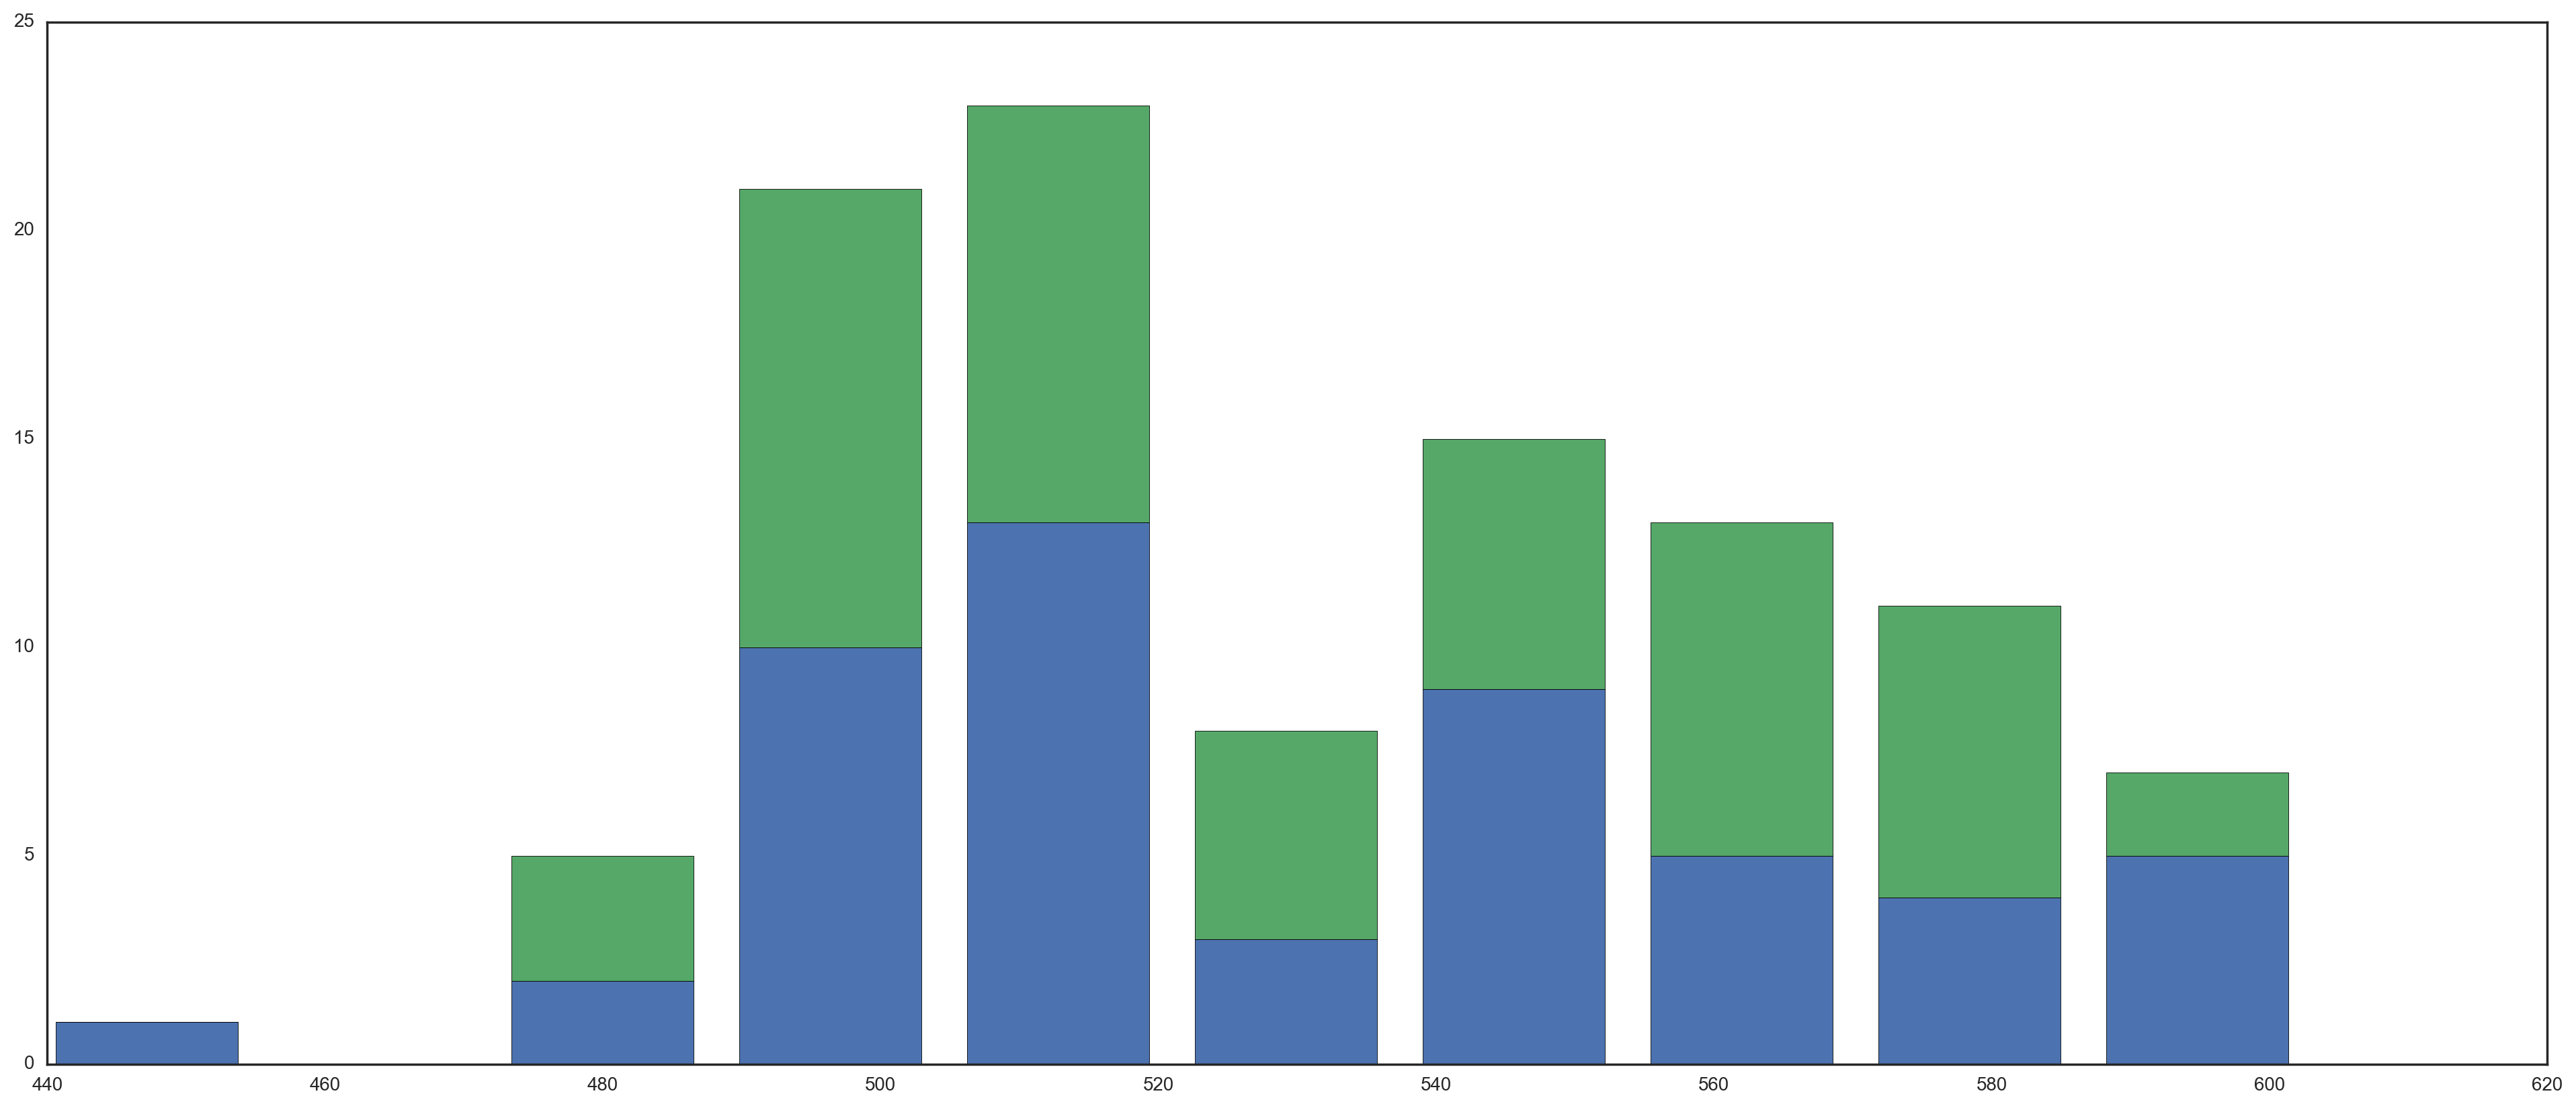

In [12]:
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})
sat_verbal = sat["Verbal"]
sat_math = sat["Math"]
sat_rate = sat["Rate"]
plt.hist([sat_math,sat_verbal], stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots (pandas or seaborn)

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [176]:
#the problem is that the data is to sparsley populated to get an accurate view of the data. 
#Cannot get a good idea of the scale when looking at smaller data points

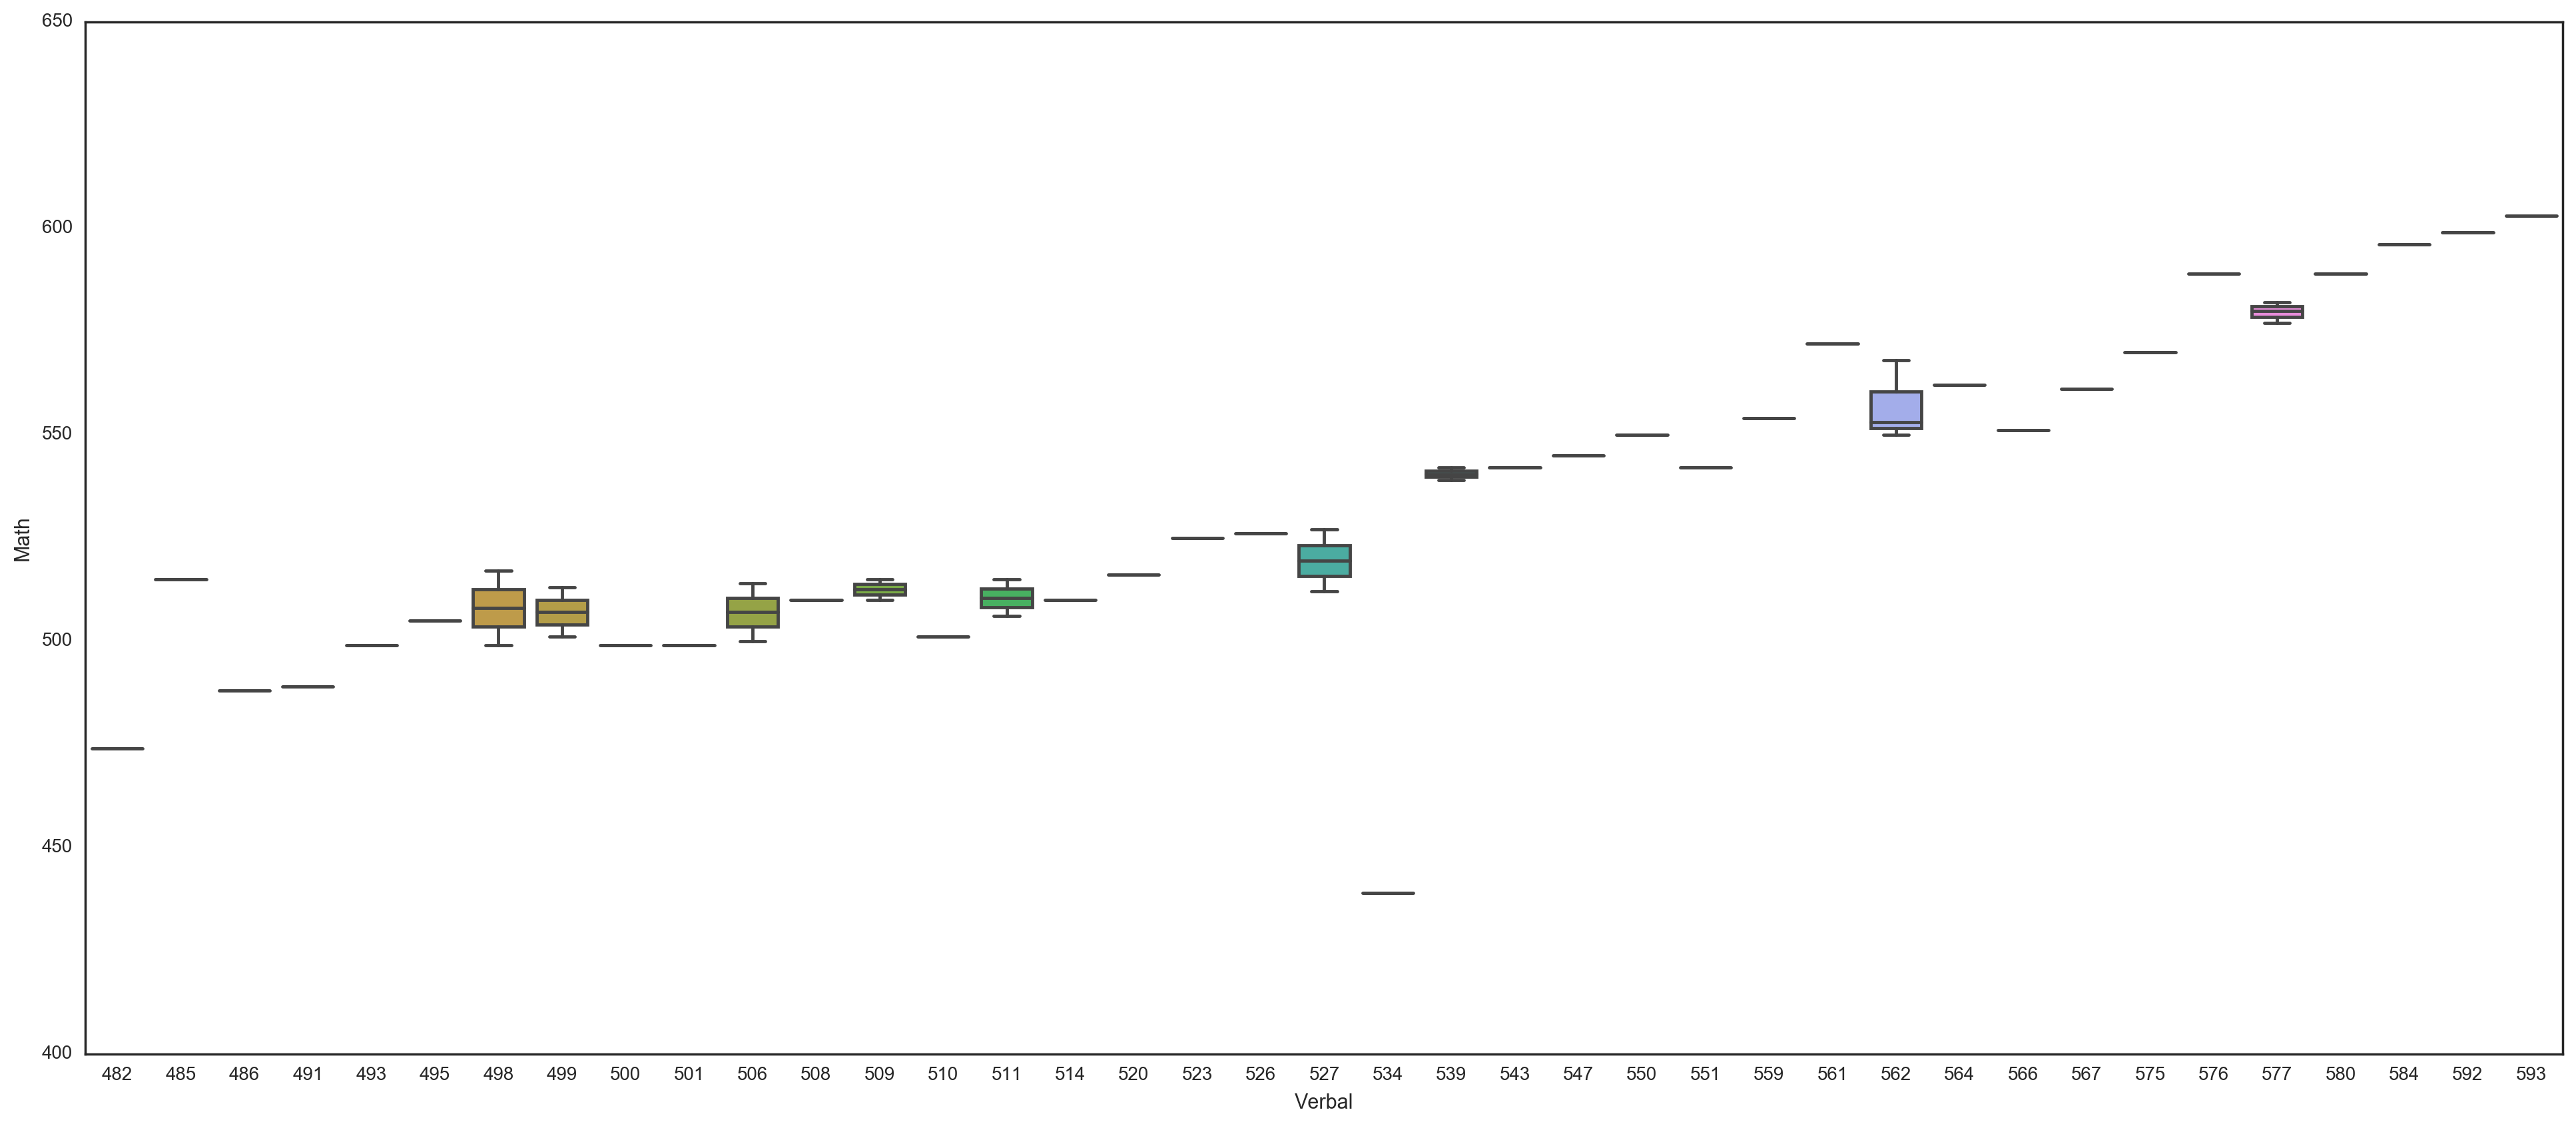

In [13]:

sns.boxplot(sat_verbal, sat_math )

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart (pandas or seaborn)

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


{'boxes': [<matplotlib.lines.Line2D at 0x12bd73d50>,
 'caps': [<matplotlib.lines.Line2D at 0x12bd8e690>,
 'fliers': [<matplotlib.lines.Line2D at 0x12bdb32d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12bd8ee90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12bd73e50>,
  <matplotlib.lines.Line2D at 0x12bdc2190>]}

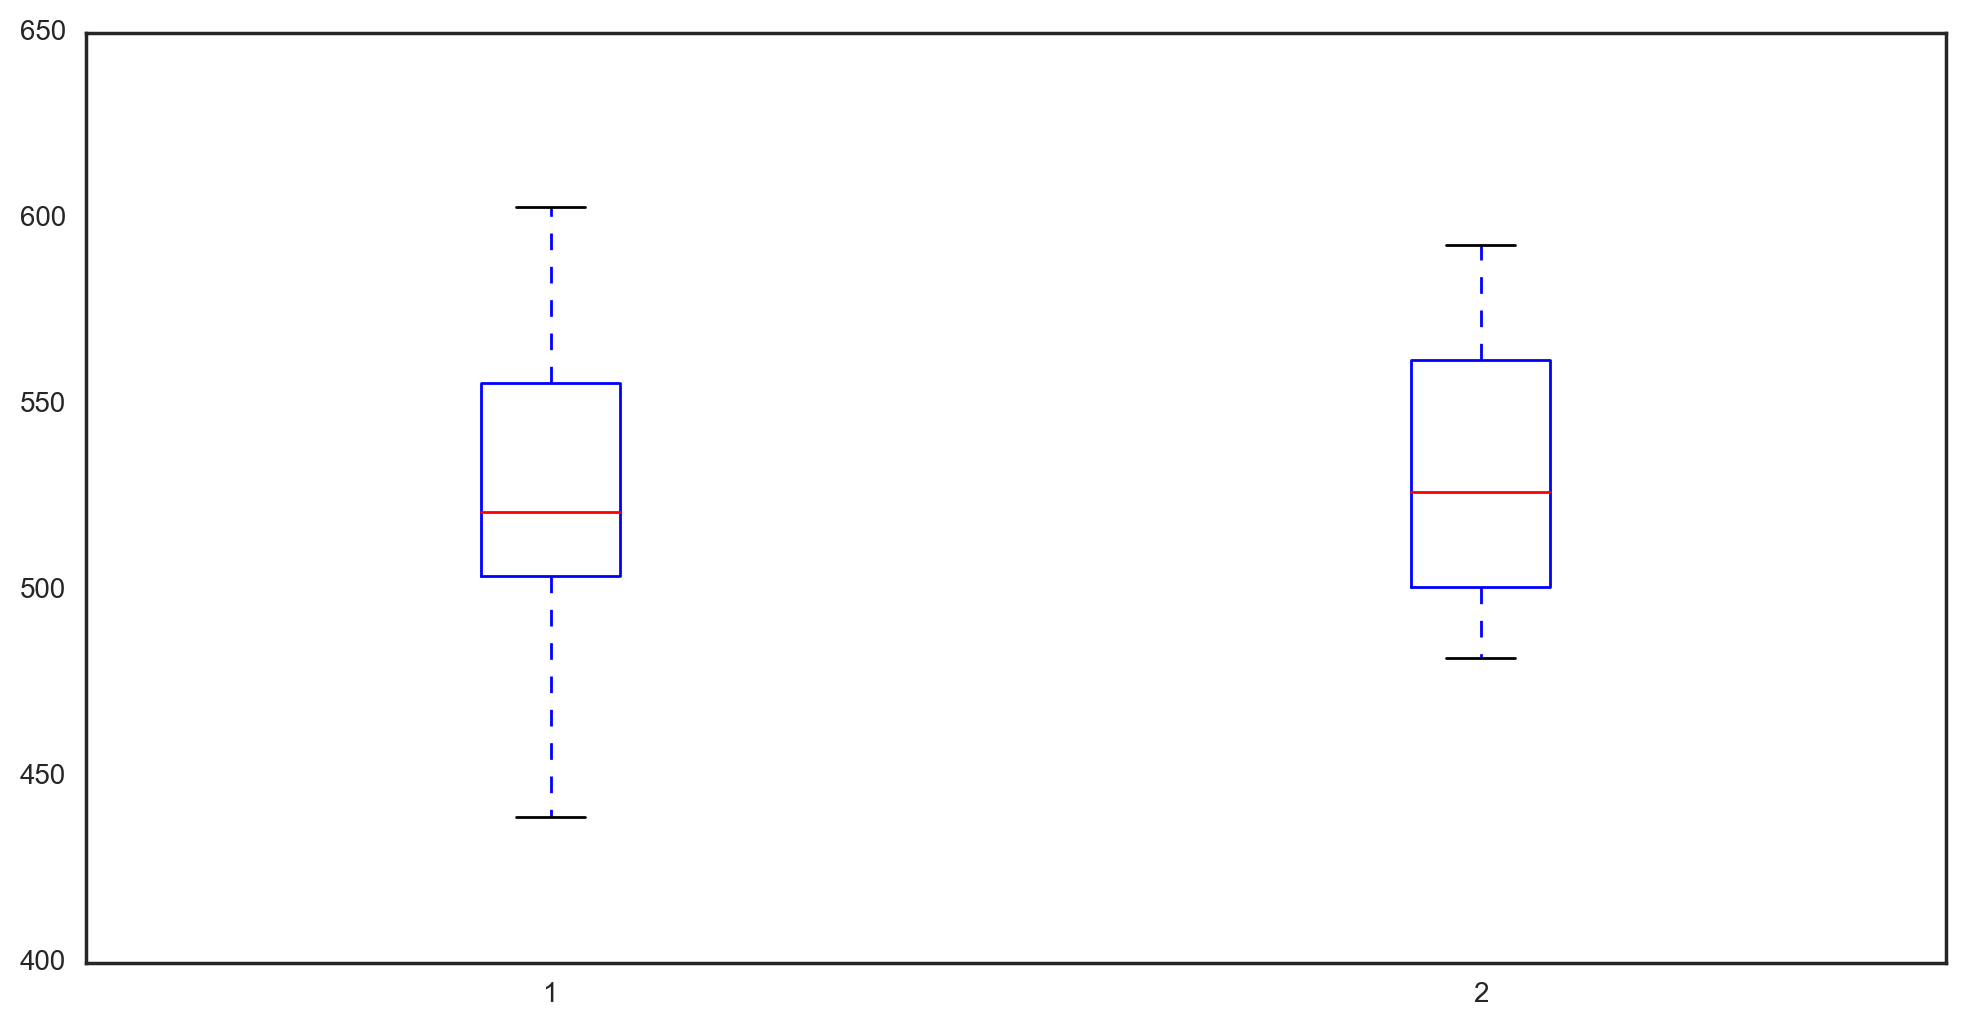

In [177]:
fig, ax = plt.subplots(1,1, figsize=(12,6))



ax.boxplot([sat_math, sat_verbal])

#Here we can see the box plots with the min value, max value and the corresponding quartiles for Math and Verbal
# #1 is Math scores, #2 is Verbal scores

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?



In [139]:
mean = sat["Verbal"].mean()
print mean
sat[sat["Verbal"] > mean]


532.019230769


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [178]:
len(sat[sat["Verbal"] > mean]), len(sat["Verbal"])
#There are 24 states that are above the mean, looks like it could be normally dist'

(24, 52)

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [136]:
median = sat["Verbal"].median()
median
sat[sat["Verbal"] > median]


,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


In [141]:
len(sat[sat["Verbal"] > median])
#There are 26 states thats are above the median, but its the median so the this tells us nothing other than 
#there are 52 data points(52 states). It does tell us that the median is greater than the mean and the data
#seems to be skewed to the right

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [179]:
sat["Difference"] = sat["Verbal"] - sat["Math"]
sat["Difference"]

0     -1
1    -14
2     -4
3    -10
4      4
5      2
6      1
7      5
8      6
9      9
10     2
11    -2
12    -6
13     2
14    -2
15    -2
16     8
17     0
18    -1
19     0
20    -6
21   -30
22     4
23   -19
24    -2
25    -6
26    -3
27    95
28     0
29    15
30     1
31     9
32     9
33   -13
34     0
35     2
36   -11
37    -9
38    -3
39     5
40    -6
41     6
42     0
43     2
44   -12
45    12
46     5
47   -10
48    -5
49    -7
50    15
51    -8
Name: Difference, dtype: int64

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [180]:
sat_verbal_greater = sat[sat["Verbal"] >sat["Math"]]
sat_verbal_greater.sort_values(by ="Difference", ascending=False).head(3)

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [181]:
sat_math_greater = sat[sat["Math"] >sat["Verbal"]]
sat_math_greater.sort_values(by ="Difference", ascending=True).head(3)

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [182]:
sat.corr()
#Large Negative correlation between Rate & Verbal
#Large Negative correlation between Rate & Math
#Large Positive correlation between Verbal & Math

,Rate,Verbal,Math,Difference
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Difference,-0.101412,0.052600,-0.388219,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [183]:
sat.describe()

#Count - count of items in each column
#Mean - mean of each column
#Std - Standard deviation of each column
#Min - Minimum value in each column
#25% - Value at the 1st quartile
#50% - Value at the second quartile, median
#75% - Value at the third quartile
#Max - Maximum 

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [184]:
sat.cov()

# Covariance measusues how much each variable changes in relation to each other
# Correlation measures the effect 

,Rate,Verbal,Math,Difference
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Difference,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Load Iowa Liquor Sales dataset

---

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.


In [186]:
file1 = '/Users/tyronewilliams/Desktop/DSI-SF-4-bosydomo/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7.1 Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [187]:
iowa = pd.read_csv(file1)
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Clean the liquor dataset

---

### 8.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [188]:
iowa["State Bottle Cost"] = iowa["State Bottle Cost"].str.replace("$","")
iowa["State Bottle Retail"] = iowa["State Bottle Retail"].str.replace("$","")
iowa["Sale (Dollars)"] =iowa["Sale (Dollars)"].str.replace("$","")
iowa["Volume Sold (Liters)"] = iowa["Volume Sold (Gallons)"]*3.78





In [189]:
iowa[["Sale (Dollars)", "State Bottle Cost", "State Bottle Retail", "Volume Sold (Liters)","Bottle Volume (ml)", "Bottles Sold"]] = iowa[["Sale (Dollars)", "State Bottle Cost", "State Bottle Retail", "Volume Sold (Liters)","Bottle Volume (ml)", "Bottles Sold"]].apply(pd.to_numeric)

In [190]:
iowa.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 8.2 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [191]:
def year(x):
    s = x.split("/")
    return s[2]

iowa["Year"] = iowa["Date"].apply(year)
iowa["Year"]

0         2015
1         2016
2         2016
3         2016
4         2015
5         2015
6         2015
7         2015
8         2016
9         2015
10        2015
11        2015
12        2015
13        2016
14        2016
15        2015
16        2016
17        2015
18        2015
19        2015
20        2015
21        2015
22        2015
23        2015
24        2016
25        2015
26        2015
27        2015
28        2015
29        2015
          ... 
270925    2015
270926    2015
270927    2015
270928    2015
270929    2016
270930    2015
270931    2015
270932    2015
270933    2015
270934    2015
270935    2015
270936    2015
270937    2015
270938    2015
270939    2015
270940    2015
270941    2015
270942    2015
270943    2015
270944    2016
270945    2015
270946    2015
270947    2015
270948    2015
270949    2015
270950    2015
270951    2015
270952    2015
270953    2015
270954    2015
Name: Year, dtype: object

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to handle missing data for stores not open for the full 2015 year. Do you impute? Remove the stores? Something else?
3. Implement your plan.
4. Briefly report on what you did and why.


In [194]:
#Didnt really find the need to find, or seperate stores that were open/closed. Its irrelevant for the analysis
#that we are doing below
iowa_2015 = iowa[iowa["Year"] =="2015"]
iowa_2016 = iowa[iowa["Year"] =="2016"]

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Examine liquor profits

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 10.1 Calculate yearly liquor sales for each store in 2015.

In [196]:
#Look at the data first 
iowa_2015 = iowa[iowa["Year"] =="2015"]
iowa_2015.groupby(["Store Number", "Year"])["Year", "Sale (Dollars)"].sum().reset_index()

,Store Number,Year,Sale (Dollars)
0,2106,2015,146326.22
1,2113,2015,9310.22
2,2130,2015,111871.43
3,2152,2015,7721.08
4,2178,2015,24324.18
5,2190,2015,121689.06
6,2191,2015,125093.49
7,2200,2015,22811.55
8,2205,2015,24681.39
9,2228,2015,17462.07


In [197]:
iowa_2015.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,8.9964,2.38,2015
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,20.9790,5.55,2015
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.4706,2.77,2015
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.2302,0.59,2015
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.4776,0.92,2015


### 10.2 Calculate the profit each store is making in 2015.


In [199]:
#Total cost column
iowa["Total_Cost"] = iowa["State Bottle Cost"] * iowa["Bottles Sold"]


In [200]:
#Profit Column
iowa["Profit"] = iowa["Sale (Dollars)"] - iowa["Total_Cost"]
iowa_2015 = iowa[iowa["Year"] =="2015"]

In [201]:
iowa_2015["Profit"]

0          27.00
4          43.20
5          39.96
6           9.99
7          15.76
9           7.62
10         78.72
11         19.50
12          4.46
15          9.00
17         39.00
18         59.04
19         29.94
20         14.26
21         31.44
22         42.00
23         63.00
25        214.80
26          3.68
27          5.25
28         33.00
29          2.45
30          3.00
31         12.08
32         43.20
33         45.72
34          5.38
35         13.04
36         31.68
37         73.56
           ...  
270923    135.00
270924      7.48
270925     12.00
270926     93.00
270927     55.56
270928     43.20
270930     11.64
270931     31.56
270932     29.68
270933     13.50
270934     10.00
270935     22.62
270936     63.00
270937      9.28
270938      7.14
270939     14.70
270940     24.08
270941     21.54
270942     33.12
270943      3.42
270945     21.60
270946     19.32
270947     15.00
270948     12.75
270949      6.21
270950     40.60
270951     11.22
270952     45.

### 10.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [203]:
iowa_profit = iowa_2015.groupby("Store Number")["Volume Sold (Gallons)","Profit"].sum().reset_index()

iowa_profit["Profit/Gallon"] = iowa_profit["Profit"] / iowa_profit["Volume Sold (Gallons)"]
iowa_profit.sort_values(by= "Profit/Gallon", ascending=False)

,Store Number,Volume Sold (Gallons),Profit,Profit/Gallon
1220,5053,0.20,22.50,112.500000
886,4669,36.39,3143.12,86.373179
1367,9001,168.83,9403.68,55.699106
1047,4849,65.81,3332.80,50.642759
1358,5201,2.28,96.65,42.390351
1303,5139,11.02,440.16,39.941924
1366,5215,0.48,18.68,38.916667
1368,9002,328.17,12574.08,38.315751
1204,5036,83.69,3166.06,37.830804
1337,5175,2.05,74.99,36.580488


### 10.4 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [204]:
liqour_list = iowa["Item Description"].unique().tolist()

def liqour_type(x):
    liqours = ["vodka","gin", "whiskey", "bourbon", "brandy","rum","tequila", "liqueur"]
    s = x.lower()
    if liqours[0] in s:
        return liqours[0]
    elif liqours[1] in s :
        return liqours[1]
    elif liqours[2] in s:
        return liqours[2]
    elif liqours[3] in s:
        return liqours[3]
    elif liqours[4] in s:
        return liqours[4]
    elif liqours[5] in s:
        return liqours[5]
    elif liqours[6] in s:
        return liqours[6]
    elif liqours[7] in s:
        return liqours[7]
    else:
        return "other"
    
    
d = "Some good vodka"

liqour_type(d)
iowa["Liqour Type"] = iowa["Item Description"].apply(liqour_type)


### 10.5 Do relationships exist between the broader liquor type and profit?

In [205]:
#Getting profit Per Litre 

iowa_profit_perL = iowa.groupby(["Liqour Type"])["Liqour Type", "Profit", "Volume Sold (Liters)"].sum()
iowa_profit_perL["Profit Per L"] = iowa_profit_perL["Profit"]/iowa_profit_perL["Volume Sold (Liters)"]
iowa_profit_perL.sort_values(by = "Profit Per L", ascending = False)

,Profit,Volume Sold (Liters),Profit Per L
Liqour Type,,,
liqueur,3.932099e+05,5.385876e+04,7.300761
bourbon,1.627911e+05,2.652619e+04,6.136995
tequila,4.993696e+05,8.477565e+04,5.890484
other,5.513738e+06,1.009438e+06,5.462184
gin,5.544213e+05,1.062206e+05,5.219528
rum,1.264467e+06,2.711612e+05,4.663155
whiskey,6.779133e+05,1.530548e+05,4.429218
brandy,1.808576e+05,4.537176e+04,3.986127
vodka,2.430699e+06,6.798692e+05,3.575244


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Proposing a new liquor tax

---

### The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [114]:
#Finding the total amount of liqour sold by Store Number
iowa.groupby(["Store Number"])["Store Number","Volume Sold (Liters)"].sum()

#Impose a progressive tax where stores who sell over certain amounts are taxed at higher amounts. For example:
# Stores who sell < 1000L, tax = 0.0%
# Stores who sell < 2500L but > 1000L, tax = 1.0%
# Stores who sell < 5000L but > 2500L, tax = 2.0%
# Stores who sell < 7500L but > 5000L, tax = 3.0%
# Stores who sell < 10000L but > 7500L, tax = 4.0%
# Stores who sell > 10000L , tax = 5.0%

#Easy to implement, since the government can track the amount of liqour sold to each stores. 
#Larger stores obviously sell more and therby are taxed at a higher amount





,Store Number,Volume Sold (Liters)
Store Number,,
2106,1377324,11834.6130
2113,388792,835.4934
2130,1084170,8436.8844
2152,367992,772.2162
2178,642510,2434.6602
2190,3560940,7834.9194
2191,1619149,10966.2336
2200,1067000,2132.9028
2205,635040,1554.7518


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 2 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [160]:
#Investigate whether months affects liqour sales,
#Investigate whether liqour types are affected by changes in months 

def get_month(x):
    s= x.split("/")
    return s[0]

def get_day(x):
    s= x.split("/")
    return s[1]

iowa["Month"]=  iowa["Date"].apply(get_month)
iowa["Day"]= iowa["Date"].apply(get_day)

In [161]:
#Mean Volume sold by month
iowa.groupby(["Month"])["Liqour Type", "Volume Sold (Liters)"].mean().reset_index()

,Month,Volume Sold (Liters)
0,01,8.164117
1,02,9.122301
2,03,8.493954
3,04,9.071861
4,05,9.552844
5,06,9.444608
6,07,8.415664
7,08,8.544918
8,09,9.015896
9,10,11.068928


In [162]:
#Mean Volume sold by year
iowa.groupby(["Year"])["Liqour Type", "Volume Sold (Liters)"].mean().reset_index()

,Year,Volume Sold (Liters)
0,2015,9.075025
1,2016,8.527918


In [163]:
iowa_volume = iowa.groupby(["Month", "Liqour Type"])["Month", "Liqour Type","Volume Sold (Liters)"].sum()
iowa_volume=iowa_volume.reset_index()

In [119]:
iowa_volume

,Month,Liqour Type,Volume Sold (Liters)
0,01,bourbon,2645.5086
1,01,brandy,5453.2170
2,01,gin,11367.2916
3,01,liqueur,6368.5062
4,01,other,101113.7148
5,01,rum,32404.8816
6,01,tequila,7268.0706
7,01,vodka,77702.9274
8,01,whiskey,15800.9670
9,02,bourbon,3047.6250


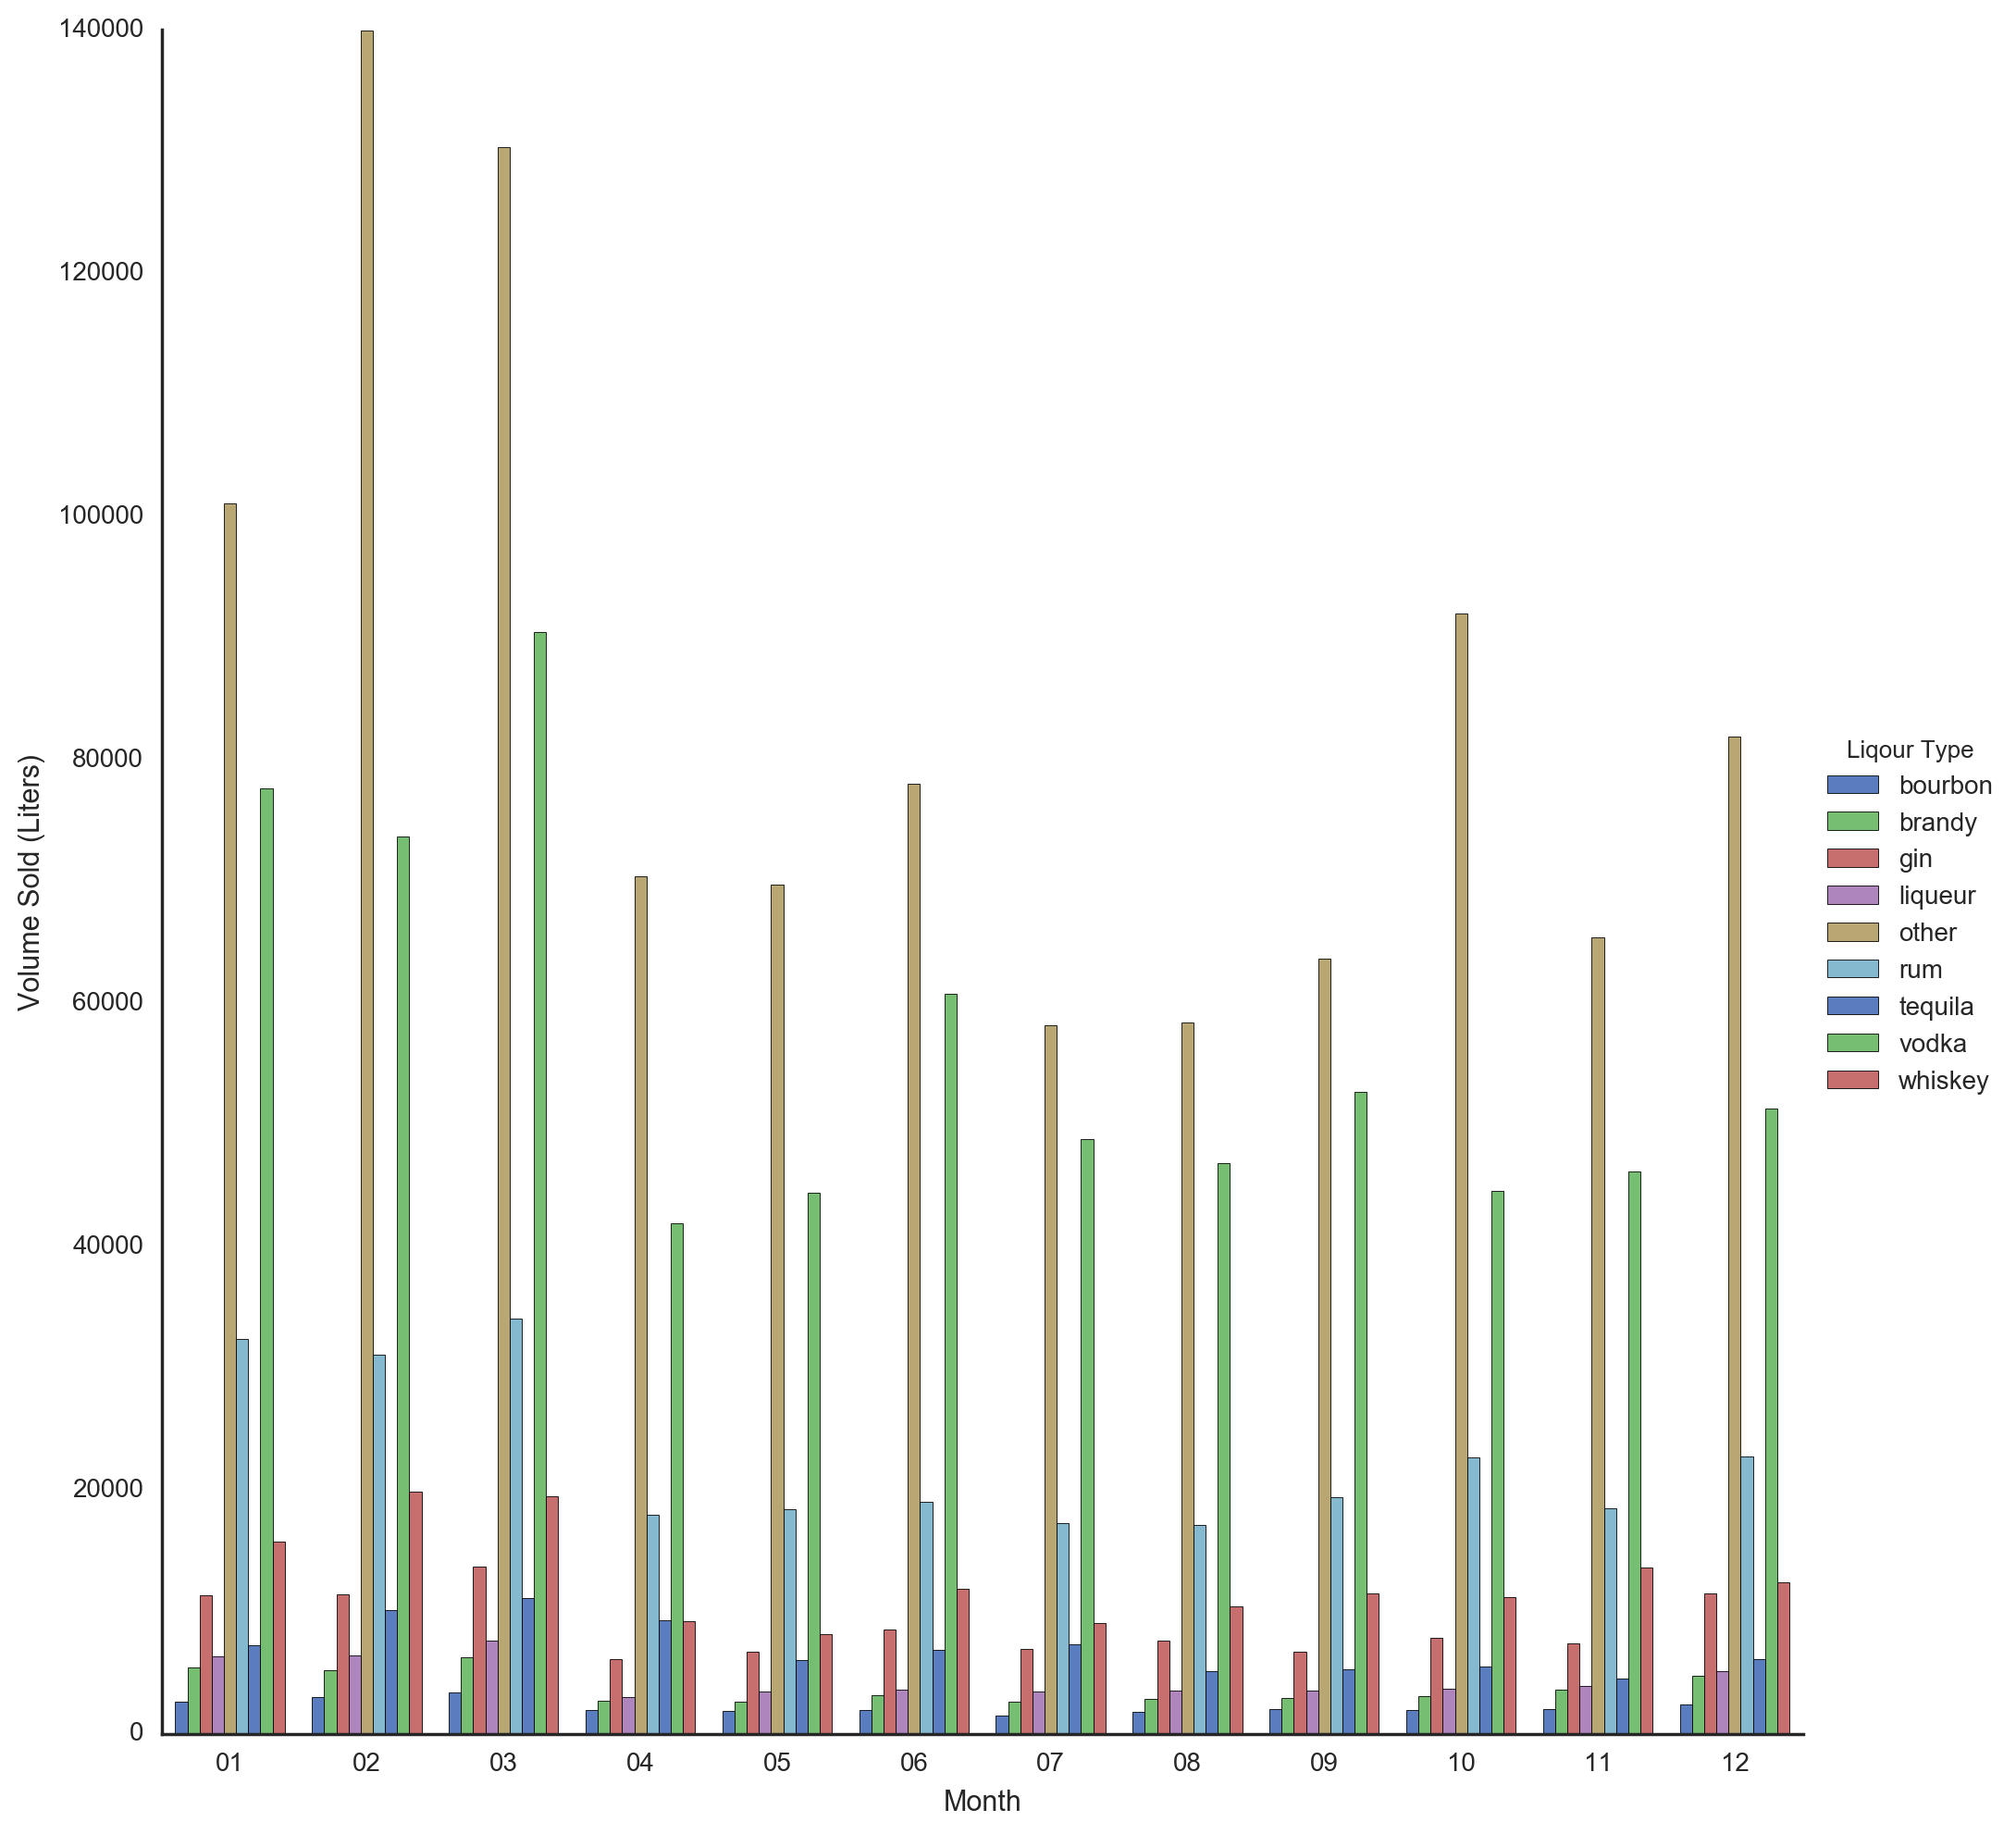

In [164]:

g = sns.factorplot(x= "Month", y="Volume Sold (Liters)",hue="Liqour Type",
                   data= iowa_volume, size=10, kind="bar", palette="muted" )

#Tends to be lower alcohol consumption in summer months as compared to winter months

In [121]:
liqour_list

['Mr. Boston Apricot Brandy',
 'Tin Cup',
 'Jim Beam',
 '1800 Ultimate Margarita',
 "Five O'clock Vodka",
 'New Amsterdam Gin',
 'Korbel Brandy',
 'Canadian Club Whisky',
 'Absolut Swedish Vodka 80 Prf',
 'Dekuyper Hot Damn!',
 'Knob Creek Single Barrel Reserve',
 "Chi-Chi's Margarita W/tequila",
 'Windsor Canadian Pet',
 'Kinky Liqueur',
 'Uv Red (cherry) Vodka',
 'Uv Cake Vodka',
 'Juarez Gold Dss',
 'Lord Calvert Canadian Whisky',
 '44 North Huckleberry',
 'Black Velvet Traveler',
 'Seagrams 7 Crown Bl Whiskey',
 'Jose Cuervo Especial Reposado Tequila',
 "Five O'clock PET Vodka",
 'Jack Daniels Old #7 Black Lbl',
 'Crown Royal Canadian Whisky Mini',
 'Hawkeye Blend Whiskey',
 'UV Vodka PET',
 'Piehole Apple Pie Mini',
 'Paramount Gin',
 'Dekuyper 03',
 'Dekuyper Sour Apple',
 'Arrow Wild Cherry Flav Brandy',
 'Jagermeister Liqueur',
 'Bartenders Hot Sex',
 'Tanqueray Gin',
 'Viniq Ruby',
 'Wild Turkey 101',
 'Dekuyper Watermelon Pucker',
 'Paramount Blackberry Brandy',
 'New Amsterd

In [ ]:
#Results:
# Winter months there tends to be a large increase in total liqour sales as compared to summer months
#However our groupby shows that the average amount of liqour tends to remain constant over the years. 
#Regression would be the next step in finding finding if these finding are statistically significant 